In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
# import torch
# from torch import nn
# import torch.nn.functional as F
# from torch import optim
import sklearn
# from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing

In [14]:
# main function
raw_data = pd.read_csv('zhengyang/data_novarice.csv')
raw_df = pd.DataFrame({
    "gender": raw_data.gender,
    "race": raw_data.race,
    "age": raw_data.age,  
    "atrial_fibrillation": raw_data.atrial_fibrillation,
    "ischemic_stroke": raw_data.ischemic_stroke, 
    "trsnsient_ischemic_attack": raw_data.trsnsient_ischemic_attack,
    "peripheral_arterial_occusive": raw_data.peripheral_arterial_occusive, 
    "myocardial_infarction": raw_data.myocardial_infarction,
    "congestive_heart_failure": raw_data.congestive_heart_failure,
    "hypertension": raw_data.hypertension,
    "diabates_mellitus": raw_data.diabates_mellitus,
    "hyperlipidemia": raw_data.hyperlipidemia,
    "aspirin": raw_data.aspirin,
    #"warfarin":raw_data.warfarin,
    "bb": raw_data.bb,
    "heartrate_max": raw_data.heartrate_max,
    "sbp_min": raw_data.sbp_min,
    #"map_min": raw_data.map_min,
    "base_excess_val": raw_data.base_excess_val,
    "ph_val": raw_data.ph_val,
    "hemoglobin_val": raw_data.hemoglobin_val,
    "lactate_val": raw_data.lactate_val,
    "pt_val": raw_data.pt_val,
    "ptt_val": raw_data.ptt_val,
    "inr_val": raw_data.inr_val,
    "urea_nitrogen_val": raw_data.urea_nitrogen_val,
    "creatinine_val": raw_data.creatinine_val,
    "platelet_count_val": raw_data.platelet_count_val,
    "bilirubin_val": raw_data.bilirubin_val,
    "albumin_val": raw_data.albumin_val,
    "bun": raw_data.bun,
    "label": raw_data.trans
})
# change the race and gender into values
raw_df['gender'] = raw_df['gender'].replace(['F'], 1)
raw_df['gender'] = raw_df['gender'].replace(['M'], 0)
raw_df['race'] = raw_df['race'].replace(['WHITE'], 1)
raw_df['race'] = raw_df['race'].replace(['BLACK/AFRICAN AMERICAN', 'HISPANIC/LATINO - DOMINICAN',
       'WHITE - OTHER EUROPEAN', 'OTHER', 'ASIAN','UNKNOWN'],0)
raw_df['race'] = raw_df['race'].replace(['ASIAN - CHINESE', 'BLACK/CARIBBEAN ISLAND', 'BLACK/CAPE VERDEAN',
       'ASIAN - SOUTH EAST ASIAN', 'HISPANIC/LATINO - PUERTO RICAN',
       'WHITE - RUSSIAN', 'WHITE - EASTERN EUROPEAN'],0)
raw_df['race'] = raw_df['race'].replace(['PATIENT DECLINED TO ANSWER', 'MULTIPLE RACE/ETHNICITY',
       'HISPANIC/LATINO - HONDURAN', 'UNABLE TO OBTAIN', 'PORTUGUESE',
       'HISPANIC/LATINO - COLUMBIAN', 'HISPANIC OR LATINO'],0)
raw_df['race'] = raw_df['race'].replace(['AMERICAN INDIAN/ALASKA NATIVE', 'BLACK/AFRICAN',
       'WHITE - BRAZILIAN', 'HISPANIC/LATINO - GUATEMALAN',
       'HISPANIC/LATINO - SALVADORAN', 'HISPANIC/LATINO - MEXICAN',
       'SOUTH AMERICAN'],0)
raw_df['race'] = raw_df['race'].replace(['NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER',
       'ASIAN - ASIAN INDIAN', 'ASIAN - KOREAN'],0)
raw_df['gender']=raw_df['gender'].astype(float)
raw_df['race']=raw_df['race'].astype(float)
raw_df

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun,label
0,1.0,0.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,44.0,182.0,0.4,3.3,0.409091,1
1,1.0,0.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,140.8,622.0,0.1,NaN,0.177557,1
2,0.0,0.0,55.191310,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,29.5,1.2,21.0,52.8,102.0,3.2,2.7,0.397727,1
3,1.0,0.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,52.8,279.0,NaN,NaN,0.246212,1
4,0.0,0.0,52.317101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,13.0,28.1,1.2,21.0,96.8,100.0,1.2,NaN,0.216942,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,81.526773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,25.0,70.4,451.0,NaN,NaN,0.355114,0
2563,0.0,0.0,77.704450,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.9,39.2,2.3,34.0,114.4,363.0,0.2,NaN,0.297203,0
2564,1.0,0.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,30.0,79.2,407.0,0.4,NaN,0.378788,0
2565,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,5.0,52.8,279.0,NaN,3.4,0.094697,0


In [16]:
# data pre-processing
all_features = list(raw_df)
target = ['label']
features = list(set(all_features)-set(target))
# raw_df.features = DataScaler(raw_df.features)
# raw_df[:,features] = DataScaler(raw_df[:,features])

# fill the binary missing values
raw_df['atrial_fibrillation'] = raw_df['atrial_fibrillation'].fillna(0)
raw_df['ischemic_stroke'] = raw_df['ischemic_stroke'].fillna(0)
raw_df['trsnsient_ischemic_attack'] = raw_df['trsnsient_ischemic_attack'].fillna(0)
raw_df['peripheral_arterial_occusive'] = raw_df['peripheral_arterial_occusive'].fillna(0)
raw_df['myocardial_infarction'] = raw_df['myocardial_infarction'].fillna(0)
raw_df['congestive_heart_failure'] = raw_df['congestive_heart_failure'].fillna(0)
raw_df['hypertension'] = raw_df['hypertension'].fillna(0)
raw_df['diabates_mellitus'] = raw_df['diabates_mellitus'].fillna(0)
raw_df['hyperlipidemia'] = raw_df['hyperlipidemia'].fillna(0)
raw_df['aspirin'] = raw_df['aspirin'].fillna(0)
#raw_df['warfarin'] = raw_df['warfarin'].fillna(0)
raw_df['bb'] = raw_df['bb'].fillna(0)

raw_df
# raw_df(raw_df.info())

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun,label
0,1.0,0.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.6,23.5,1.2,18.0,44.0,182.0,0.4,3.3,0.409091,1
1,1.0,0.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,25.0,140.8,622.0,0.1,NaN,0.177557,1
2,0.0,0.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,29.5,1.2,21.0,52.8,102.0,3.2,2.7,0.397727,1
3,1.0,0.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.7,28.0,1.2,13.0,52.8,279.0,NaN,NaN,0.246212,1
4,0.0,0.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,28.1,1.2,21.0,96.8,100.0,1.2,NaN,0.216942,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,81.526773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,25.0,70.4,451.0,NaN,NaN,0.355114,0
2563,0.0,0.0,77.704450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.9,39.2,2.3,34.0,114.4,363.0,0.2,NaN,0.297203,0
2564,1.0,0.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,NaN,NaN,NaN,30.0,79.2,407.0,0.4,NaN,0.378788,0
2565,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,NaN,NaN,NaN,5.0,52.8,279.0,NaN,3.4,0.094697,0


In [17]:
# Impute with mean imputation
from sklearn.impute import SimpleImputer
df = raw_df.copy()
mean_imputer = SimpleImputer(strategy='mean')
df['heartrate_max'] = mean_imputer.fit_transform(df['heartrate_max'].values.reshape(-1,1))
#df['map_min'] = mean_imputer.fit_transform(df['map_min'].values.reshape(-1,1))
df['base_excess_val'] = mean_imputer.fit_transform(df['base_excess_val'].values.reshape(-1,1))
df['ph_val'] = mean_imputer.fit_transform(df['ph_val'].values.reshape(-1,1))
df['hemoglobin_val'] = mean_imputer.fit_transform(df['hemoglobin_val'].values.reshape(-1,1))
df['lactate_val'] = mean_imputer.fit_transform(df['lactate_val'].values.reshape(-1,1))
df['pt_val'] = mean_imputer.fit_transform(df['pt_val'].values.reshape(-1,1))
df['ptt_val'] = mean_imputer.fit_transform(df['ptt_val'].values.reshape(-1,1))
df['inr_val'] = mean_imputer.fit_transform(df['inr_val'].values.reshape(-1,1))
df['urea_nitrogen_val'] = mean_imputer.fit_transform(df['urea_nitrogen_val'].values.reshape(-1,1))
df['creatinine_val'] = mean_imputer.fit_transform(df['creatinine_val'].values.reshape(-1,1))
df['platelet_count_val'] = mean_imputer.fit_transform(df['platelet_count_val'].values.reshape(-1,1))
df['bilirubin_val'] = mean_imputer.fit_transform(df['bilirubin_val'].values.reshape(-1,1))
df['albumin_val'] = mean_imputer.fit_transform(df['albumin_val'].values.reshape(-1,1))
df

,gender,race,age,atrial_fibrillation,ischemic_stroke,trsnsient_ischemic_attack,peripheral_arterial_occusive,myocardial_infarction,congestive_heart_failure,hypertension,...,pt_val,ptt_val,inr_val,urea_nitrogen_val,creatinine_val,platelet_count_val,bilirubin_val,albumin_val,bun,label
0,1.0,0.0,50.681784,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.600000,23.500000,1.20000,18.0,44.0,182.0,0.400000,3.300000,0.409091,1
1,1.0,0.0,66.859548,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.175544,34.304029,1.50325,25.0,140.8,622.0,0.100000,3.208407,0.177557,1
2,0.0,0.0,55.191310,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,29.500000,1.20000,21.0,52.8,102.0,3.200000,2.700000,0.397727,1
3,1.0,0.0,34.918965,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12.700000,28.000000,1.20000,13.0,52.8,279.0,1.450779,3.208407,0.246212,1
4,0.0,0.0,52.317101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.000000,28.100000,1.20000,21.0,96.8,100.0,1.200000,3.208407,0.216942,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2562,0.0,0.0,81.526773,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.175544,34.304029,1.50325,25.0,70.4,451.0,1.450779,3.208407,0.355114,0
2563,0.0,0.0,77.704450,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,23.900000,39.200000,2.30000,34.0,114.4,363.0,0.200000,3.208407,0.297203,0
2564,1.0,0.0,85.320623,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,16.175544,34.304029,1.50325,30.0,79.2,407.0,0.400000,3.208407,0.378788,0
2565,1.0,0.0,34.281772,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,16.175544,34.304029,1.50325,5.0,52.8,279.0,1.450779,3.400000,0.094697,0


In [18]:
# reduce the dtype
df = df.astype('float32')

In [20]:
df['label'].value_counts()

0.0    2037
1.0     530
Name: label, dtype: int64

In [6]:
train_data = df.sample(305)
test_data = df.drop(train_data.index)
x_train = train_data.drop(target,axis=1)
y_train = train_data.loc[:,'label']
x_valid = test_data.drop(target,axis=1)
y_valid = test_data.loc[:,'label']

x_train = np.asarray(x_train)
y_train = np.asarray(y_train)
x_valid = np.asarray(x_valid)
y_valid = np.asarray(y_valid)

In [7]:
from xgboost import XGBClassifier
model=XGBClassifier()
model.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [8]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_valid)
score=accuracy_score(y_pred,y_valid)
score

0.9019607843137255

In [9]:
from sklearn.metrics import roc_curve
y_pred_proba=model.predict_proba(x_valid)
y_pred_proba[:,1] #想看输血分类为1的概率
fpr,tpr,thres=roc_curve(y_valid,y_pred_proba[:,1])


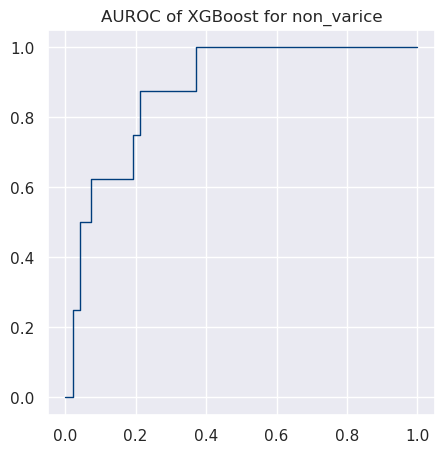

In [23]:
import matplotlib.pyplot as plt
plt.style.use('tableau-colorblind10')
plt.figure(figsize = (5,5))
plt.xlim(-0.05,1.05)
plt.ylim(-0.05,1.05)
plt.title('AUROC of XGBoost for non_varice')
plt.plot(fpr,tpr,c = '#003D7C',ls='-',lw = 1,  ms = 8, mec='r',mew=3,mfc='y',alpha =1)
plt.show()

Text(46.25, 0.5, 'True')

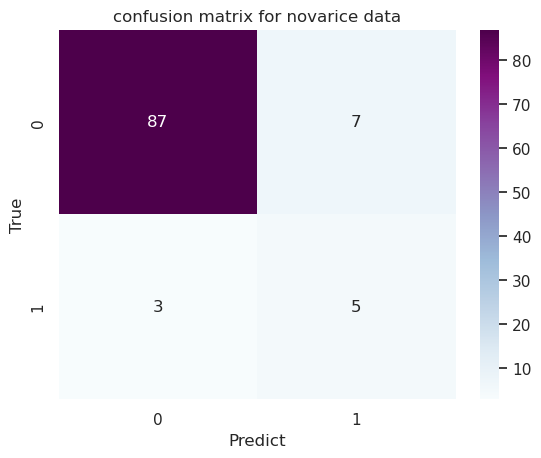

In [22]:
import seaborn as sn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

sn.set()
f,ax=plt.subplots()
C2= confusion_matrix(y_valid, y_pred, labels=[0, 1])
sn.heatmap(C2,annot=True,ax=ax, cmap="BuPu") #画热力图
ax.set_title('confusion matrix for novarice data')
ax.set_xlabel('Predict')
ax.set_ylabel('True')

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

roc_auc_score(y_valid,y_pred_proba[:,1])

0.8776595744680851